# **Multilayer Perceptron: Timing Factors and Smart-Beta Strategies** 

**Project Goal**: To build a neural network, under MLP, that aims to predict the future returns of the momentum factor.

**Data SOurce**

- We are gping to take as inputs the returns from a momentum factor. Using these inputs, we will then aim to predict next period momentum factor returns using as inputs past returns. 

- Data source is Prof. Ken French's Data Library: [Daily returns of 10 Portfolios Formed Daily on Momentum.](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_10_port_form_pr_12_2_daily.html)

In [35]:
import numpy as np
import pandas as pd

**Timing Momentum with Multilayer Perceptron (MLPs)**

In [36]:
route = "10_Portfolios_Prior_12_2_Daily.CSV"

In [37]:
# Read the csv file again with skipped rows
df = pd.read_csv(route, index_col=0)
# Format the date index
df.index = pd.to_datetime(df.index, format="%Y%m%d")
# Build the MOM strategy: Long "Hi PRIOR" and Short "Lo PRIOR"
df["Mom"] = df["Hi PRIOR"] - df["Lo PRIOR"]
df.head()

,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR,Mom
1926-11-03,-0.12,0.60,-0.09,0.30,-0.51,-0.22,-0.12,0.50,0.13,1.28,1.40
1926-11-04,0.65,1.82,1.34,0.61,1.01,0.64,0.82,0.44,0.48,0.40,-0.25
1926-11-05,-0.84,-0.77,-0.22,-0.15,-0.02,-0.02,-0.07,0.36,0.20,0.08,0.92
1926-11-06,1.03,0.28,0.24,0.40,0.19,0.64,0.10,0.10,0.39,-0.68,-1.71
1926-11-08,-0.06,0.11,1.78,0.28,0.36,0.23,0.30,1.17,0.58,-0.18,-0.12


- **Inputs and Outputs**

In [38]:
df["Ret"] = df["Mom"]
df["Ret10_MOMi"] = df["Mom"].rolling(10).apply(lambda x: np.prod(1 + x / 100) - 1)
df["Ret25_MOMi"] = df["Mom"].rolling(25).apply(lambda x: np.prod(1 + x / 100) - 1)
df["Ret60_MOMi"] = df["Mom"].rolling(60).apply(lambda x: np.prod(1 + x / 100) - 1)
df["Ret120_MOMi"] = df["Mom"].rolling(120).apply(lambda x: np.prod(1 + x / 100) - 1)
df["Ret240_MOMi"] = df["Mom"].rolling(240).apply(lambda x: np.prod(1 + x / 100) - 1)

df["Ret10_hi"] = df["Hi PRIOR"].rolling(10).apply(lambda x: np.prod(1 + x / 100) - 1)
df["Ret25_hi"] = df["Hi PRIOR"].rolling(25).apply(lambda x: np.prod(1 + x / 100) - 1)
df["Ret60_hi"] = df["Hi PRIOR"].rolling(60).apply(lambda x: np.prod(1 + x / 100) - 1)
df["Ret120_hi"] = df["Hi PRIOR"].rolling(120).apply(lambda x: np.prod(1 + x / 100) - 1)
df["Ret240_hi"] = df["Hi PRIOR"].rolling(240).apply(lambda x: np.prod(1 + x / 100) - 1)

df["Ret10_Low"] = df["Lo PRIOR"].rolling(10).apply(lambda x: np.prod(1 + x / 100) - 1)
df["Ret25_Low"] = df["Lo PRIOR"].rolling(25).apply(lambda x: np.prod(1 + x / 100) - 1)
df["Ret60_Low"] = df["Lo PRIOR"].rolling(60).apply(lambda x: np.prod(1 + x / 100) - 1)
df["Ret120_Low"] = df["Lo PRIOR"].rolling(120).apply(lambda x: np.prod(1 + x / 100) - 1)
df["Ret240_Low"] = df["Lo PRIOR"].rolling(240).apply(lambda x: np.prod(1 + x / 100) - 1)

df["Ret60"] = df["Ret60_MOMi"].shift(-60)
df = df.dropna()
df.tail(10)

df = df.drop(
    [
        "Lo PRIOR",
        "PRIOR 2",
        "PRIOR 3",
        "PRIOR 4",
        "PRIOR 5",
        "PRIOR 6",
        "PRIOR 7",
        "PRIOR 8",
        "PRIOR 9",
        "Hi PRIOR",
        "Mom",
    ],
    axis=1,
)

In [39]:
df.head()

,Ret,Ret10_MOMi,Ret25_MOMi,Ret60_MOMi,Ret120_MOMi,Ret240_MOMi,Ret10_hi,Ret25_hi,Ret60_hi,Ret120_hi,Ret240_hi,Ret10_Low,Ret25_Low,Ret60_Low,Ret120_Low,Ret240_Low,Ret60
1927-08-19,1.60,-0.007189,-0.011632,0.029566,0.201590,0.275852,-0.003897,0.010958,0.031462,0.181792,0.458303,0.003376,0.021960,-0.000112,-0.021026,0.125174,0.102616
1927-08-20,0.74,-0.016077,-0.002022,0.028443,0.191185,0.267548,-0.006644,0.027704,0.043832,0.192865,0.458015,0.009704,0.028920,0.013091,-0.002974,0.132384,0.087730
1927-08-22,0.71,-0.008596,0.002957,0.033884,0.216675,0.279747,-0.002775,0.025256,0.054955,0.209346,0.459903,0.005975,0.021349,0.018498,-0.010311,0.123046,0.081898
1927-08-23,0.97,0.033152,0.008149,0.038926,0.213431,0.280381,0.031562,0.018638,0.056751,0.207897,0.459320,-0.001583,0.009427,0.015219,-0.008810,0.122026,0.040216
1927-08-24,0.91,0.061988,0.007949,0.066728,0.225576,0.314510,0.070620,0.015491,0.086507,0.208018,0.470046,0.007666,0.006483,0.016347,-0.018610,0.101036,0.036711


- **Train-Test Samples and Scaling**

In [40]:
from sklearn.model_selection import train_test_split

df.reset_index(inplace=True)
df.rename(columns={"index": "Date"}, inplace=True)
df.head()

,Date,Ret,Ret10_MOMi,Ret25_MOMi,Ret60_MOMi,Ret120_MOMi,Ret240_MOMi,Ret10_hi,Ret25_hi,Ret60_hi,Ret120_hi,Ret240_hi,Ret10_Low,Ret25_Low,Ret60_Low,Ret120_Low,Ret240_Low,Ret60
0,1927-08-19,1.60,-0.007189,-0.011632,0.029566,0.201590,0.275852,-0.003897,0.010958,0.031462,0.181792,0.458303,0.003376,0.021960,-0.000112,-0.021026,0.125174,0.102616
1,1927-08-20,0.74,-0.016077,-0.002022,0.028443,0.191185,0.267548,-0.006644,0.027704,0.043832,0.192865,0.458015,0.009704,0.028920,0.013091,-0.002974,0.132384,0.087730
2,1927-08-22,0.71,-0.008596,0.002957,0.033884,0.216675,0.279747,-0.002775,0.025256,0.054955,0.209346,0.459903,0.005975,0.021349,0.018498,-0.010311,0.123046,0.081898
3,1927-08-23,0.97,0.033152,0.008149,0.038926,0.213431,0.280381,0.031562,0.018638,0.056751,0.207897,0.459320,-0.001583,0.009427,0.015219,-0.008810,0.122026,0.040216
4,1927-08-24,0.91,0.061988,0.007949,0.066728,0.225576,0.314510,0.070620,0.015491,0.086507,0.208018,0.470046,0.007666,0.006483,0.016347,-0.018610,0.101036,0.036711


In [41]:
df.reset_index(inplace=True, drop=True)

ts = int(0.4 * len(df))
split_time = len(df) - ts
test_time = df.iloc[split_time:, 0:1].values
Ret_vector = df.iloc[split_time:, 1:2].values
df.tail()

,Date,Ret,Ret10_MOMi,Ret25_MOMi,Ret60_MOMi,Ret120_MOMi,Ret240_MOMi,Ret10_hi,Ret25_hi,Ret60_hi,Ret120_hi,Ret240_hi,Ret10_Low,Ret25_Low,Ret60_Low,Ret120_Low,Ret240_Low,Ret60
25475,2024-08-29,-4.21,-0.035453,0.063937,-0.114656,-0.021273,0.182380,-0.034336,0.038463,0.002863,0.112082,0.463052,0.001078,-0.023261,0.124712,0.119166,0.183476,0.117438
25476,2024-08-30,0.88,-0.026478,0.078585,-0.125749,0.016932,0.172962,-0.022781,0.041748,-0.018133,0.147941,0.483963,0.003772,-0.033350,0.114849,0.112311,0.210427,0.059617
25477,2024-09-03,-2.00,-0.056702,0.062432,-0.133705,-0.043668,0.150308,-0.101268,-0.013252,-0.069597,0.046629,0.397170,-0.046576,-0.069687,0.067058,0.079807,0.163062,0.098866
25478,2024-09-04,0.49,-0.048273,0.106131,-0.140717,-0.033861,0.162805,-0.093159,0.019845,-0.073135,0.047156,0.412210,-0.046576,-0.076586,0.071820,0.069334,0.162827,0.075027
25479,2024-09-05,0.18,-0.049032,0.051948,-0.157206,-0.045109,0.168755,-0.101854,-0.034501,-0.084556,0.059955,0.449385,-0.054984,-0.080997,0.079483,0.095512,0.187280,0.080071


In [42]:
Xdf, ydf = df.iloc[:, 2:-1], df.iloc[:, -1]
X = Xdf.astype("float32")
y = ydf.astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=ts, shuffle=False
)
n_features = X_train.shape[1]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15288, 15) (10192, 15) (15288,) (10192,)


In [43]:
# Scaling

from sklearn.preprocessing import MinMaxScaler

scaler_input = MinMaxScaler(feature_range=(-1, 1))
scaler_input.fit(X_train)
X_train = scaler_input.transform(X_train)
X_test = scaler_input.transform(X_test)

mean_ret = np.mean(y_train)  # Useful to compute the performance = R2

scaler_output = MinMaxScaler(feature_range=(-1, 1))
y_train = y_train.values.reshape(len(y_train), 1)
y_test = y_test.values.reshape(len(y_test), 1)
scaler_output.fit(y_train)
y_train = scaler_output.transform(y_train)
y_test = scaler_output.transform(y_test)

**MLP Model and Training**

- **Activation function** - The rectified linear unit (**ReLU**).

- **Hiden layers and units within layers** - A total of 3 hidden layers, each layer will have 50, 30, and 10 unts respectively in order from the input layers. 

- **Output layer** - A fully connected layer for the output.

- **Learning rate** - A learning rate of $10^{-5}$. 

- **Optimizer** - The Adam optimizer.

- **Loss function** - Different from the linear regression case, we select a loss functtion based on the **mean absolute error (MAE)**:
$$
\begin{equation*}
    L(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i| 
\end{equation*}
$$

In [44]:
import tensorflow as tf

tf.random.set_seed(12345)

act_fun = "relu"  # Activation function
hp_units = 50  # Units in the first hidden layer
hp_units_2 = 30  # Units in the second hidden layer
hp_units_3 = 10  # Units in the third hidden layer

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=hp_units, activation=act_fun))
model.add(tf.keras.layers.Dense(units=hp_units_2, activation=act_fun))
model.add(tf.keras.layers.Dense(units=hp_units_3, activation=act_fun))
model.add(tf.keras.layers.Dense(1))

hp_lr = 1e-5

adam = tf.keras.optimizers.Adam(learning_rate=hp_lr)
model.compile(optimizer=adam, loss="mean_absolute_error")

Once we have defined our model, we can train it.

In [45]:
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=2)

Epoch 1/30
478/478 - 2s - 4ms/step - loss: 0.1793
Epoch 2/30
478/478 - 1s - 2ms/step - loss: 0.1382
Epoch 3/30
478/478 - 1s - 1ms/step - loss: 0.1324
Epoch 4/30
478/478 - 1s - 2ms/step - loss: 0.1311
Epoch 5/30
478/478 - 1s - 1ms/step - loss: 0.1304
Epoch 6/30
478/478 - 1s - 2ms/step - loss: 0.1298
Epoch 7/30
478/478 - 1s - 1ms/step - loss: 0.1293
Epoch 8/30
478/478 - 1s - 1ms/step - loss: 0.1289
Epoch 9/30
478/478 - 1s - 2ms/step - loss: 0.1285
Epoch 10/30
478/478 - 1s - 2ms/step - loss: 0.1280
Epoch 11/30
478/478 - 1s - 2ms/step - loss: 0.1276
Epoch 12/30
478/478 - 1s - 2ms/step - loss: 0.1273
Epoch 13/30
478/478 - 1s - 1ms/step - loss: 0.1269
Epoch 14/30
478/478 - 1s - 1ms/step - loss: 0.1266
Epoch 15/30
478/478 - 1s - 1ms/step - loss: 0.1263
Epoch 16/30
478/478 - 1s - 1ms/step - loss: 0.1260
Epoch 17/30
478/478 - 1s - 2ms/step - loss: 0.1257
Epoch 18/30
478/478 - 1s - 2ms/step - loss: 0.1254
Epoch 19/30
478/478 - 1s - 2ms/step - loss: 0.1252
Epoch 20/30
478/478 - 1s - 1ms/step - lo

In [46]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 50)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,955 (31.08 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,304 (20.72 KB)

In the first layer of the model,  there are 800 parameters. These are equal to the number of units in the layer (50) times the number of different inputs (15)-because there would be a weight associated with each input and unit in the layer-plus the bias terms $b$ for each unit (50). Thus, $15 \times 50 + 50 = 800$.

Where does the number of $1530$ parameters from the second layer come from?
This is equal to the number of "inputs" to this layer (which is essentially the number of units in the previous layer (50) times the number of units in the layer (30) plus the bias term for each unit (30). Thus, $50 \times 30 + 30 = 1530$.

**Validation and Early stopping**

- **How many epochs should we use when training our model?** - The choice of the number of epochs that we have used (30) is discretionary. We're going to change this by including **Early stopping** in our training. Meaning, intructing Keras to stop model training when some condition is met. This is done via the **callback API** in Keras.

- **When should we stop training** - Once after each epoch of the training process, we will check if (and how much) the loss function in the validation set decreases. We'll also define a parameter, **patience**, that indicates the number of epochs with no improvement in the validation set that we tolerate before Early stopping training. 

- Defining the characteristics of Early stopping:

1. **The quantity/set to monitor**: in our case the validation set loss function.

2. **The 'mode'**: by setting this to 'min' we ensure training will stop when the quantity set in (1) has stop decreasing.

3. **Patience**: we will allow for 10 epochs with no improvement in minimizing the loss function of the validation set before we stop training. 

4. **restore_best_weights**: due to iteration process, it may be the case that the last iteration before stopping training does not yield the model weights that acheieve the lowest loss function in validation. By settting this option to 'True' we ensure that we keep the weights that achieved the best loss function value (the lowest) in validation.

In [47]:
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", mode="mini", verbose=1, patience=10, restore_best_weights=True
)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8384\1436113438.py:1: UserWarning: EarlyStopping mode mini is unknown, fallback to auto mode.
  es = tf.keras.callbacks.EarlyStopping(


Finally, we can re-train our model with the Early stopping callback. Because we need it for the Early stopping function, we define a validation set of 20% of the training set.This split is performed by keras with no shuffling the data, and this set is kept apart - no training or testing going on in the validation set. We incorporate the callback feature es defined above.

We have selected 100 epochs for training but included an Early stopping criterion.

In [48]:
model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=2, 
    callbacks=[es],
)

Epoch 1/100
383/383 - 1s - 3ms/step - loss: 0.1204 - val_loss: 0.1344
Epoch 2/100
383/383 - 1s - 2ms/step - loss: 0.1201 - val_loss: 0.1352
Epoch 3/100
383/383 - 1s - 2ms/step - loss: 0.1198 - val_loss: 0.1357
Epoch 4/100
383/383 - 1s - 2ms/step - loss: 0.1196 - val_loss: 0.1361
Epoch 5/100
383/383 - 1s - 2ms/step - loss: 0.1194 - val_loss: 0.1364
Epoch 6/100
383/383 - 1s - 2ms/step - loss: 0.1192 - val_loss: 0.1366
Epoch 7/100
383/383 - 1s - 2ms/step - loss: 0.1190 - val_loss: 0.1368
Epoch 8/100
383/383 - 1s - 2ms/step - loss: 0.1189 - val_loss: 0.1369
Epoch 9/100
383/383 - 1s - 2ms/step - loss: 0.1187 - val_loss: 0.1371
Epoch 10/100
383/383 - 1s - 2ms/step - loss: 0.1186 - val_loss: 0.1374
Epoch 11/100
383/383 - 1s - 2ms/step - loss: 0.1184 - val_loss: 0.1375
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.


**MLP Model Performance for Momentum Timing**

**Out-of-Sample Predictive Power ($R^2_{OS}$)**

In [49]:
values = scaler_output.inverse_transform(y_test)

y_pred = model.predict(X_test)
y_pred = scaler_output.inverse_transform(y_pred)

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [50]:
y_pred.shape

(10192, 1)

In [51]:
def R2_campbell(y_true, y_predicted, mean_ret):
    y_predicted = y_predicted.reshape((-1,))
    sse = sum((y_true - y_predicted) ** 2)
    tse = sum((y_true - mean_ret) ** 2)
    r2_score = 1 - (sse /tse)
    return r2_score

R2_campbell = R2_campbell(values.flatten(), y_pred.flatten(),mean_ret)
print("R2 (Campbell): ", R2_campbell)

R2 (Campbell):  -0.007752532304756921


Let's see if we can make actaul money (over the buy-and-hold case) by following a trading strategy based on our model's predictions. 

**Backtesting Momentum Timing**

- **What do predicted versus real returns in a test set look like?**

In [52]:
df_predictions = pd.DataFrame(
    {
        "Date": test_time.flatten(),
        "Pred": y_pred.flatten(),
        "Ret": (Ret_vector.flatten() / 100),
        "Values": values.flatten(),
    }
)
df_predictions.tail()

,Date,Pred,Ret,Values
10187,2024-08-29,0.026537,-0.0421,0.117438
10188,2024-08-30,0.025984,0.0088,0.059617
10189,2024-09-03,0.035976,-0.0200,0.098866
10190,2024-09-04,0.028817,0.0049,0.075027
10191,2024-09-05,0.041140,0.0018,0.080071


In [53]:
df_predictions.Date = pd.to_datetime(df_predictions.Date, format="%YYYY-%mm-%dd")
df = df_predictions
df.tail()

,Date,Pred,Ret,Values
10187,2024-08-29,0.026537,-0.0421,0.117438
10188,2024-08-30,0.025984,0.0088,0.059617
10189,2024-09-03,0.035976,-0.0200,0.098866
10190,2024-09-04,0.028817,0.0049,0.075027
10191,2024-09-05,0.041140,0.0018,0.080071


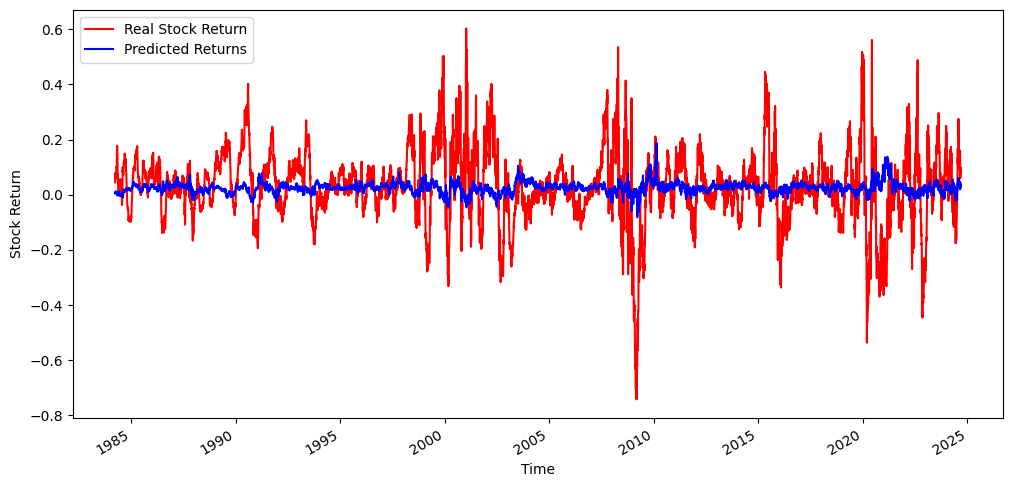

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()
df.plot(x="Date", y="Values", color="red", label="Real Stock Return", ax=ax)
df.plot(x="Date", y="Pred", color="blue", label="Predicted Returns", ax=ax)
plt.xlabel("Time")
plt.ylabel("Stock Return")
plt.legend()
plt.show()

- **Momentum timing strategy**

In [55]:
df["Positions"] = df["Pred"].apply(np.sign)
df["Strat_ret"] = df["Positions"].shift(1) * df["Ret"]
df["Positions_L"] = df["Positions"].shift(1)
df["Positions_L"][df["Positions_L"] == -1] = 0
df["Strat_ret_L"] = df["Positions_L"] * df["Ret"]
df["CumRet"] = df["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df["CumRet_L"] = df["Strat_ret_L"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df["bhRet"] = df["Ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)

Final_Return_L = np.prod(1 + df["Strat_ret_L"]) - 1
Final_Return = np.prod(1 + df["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df["Ret"]) - 1

print("Strat Return Long Only =", Final_Return_L * 100, "%")
print("Strat Return =", Final_Return * 100, "%")
print("Buy and Hold Return =", Buy_Return * 100, "%")

C:\Users\Asus\AppData\Local\Temp\ipykernel_8384\4012059038.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Positions_L"][df["Positions_L"] == -1] = 0
C:\Users\Asus\AppData\Local\Temp\ipykernel_8384\4012059038.py:4: SettingWithCopyWar

Strat Return Long Only = 3692.7803557804737 %
Strat Return = 2943.4477260471385 %
Buy and Hold Return = 2352.017807519138 %


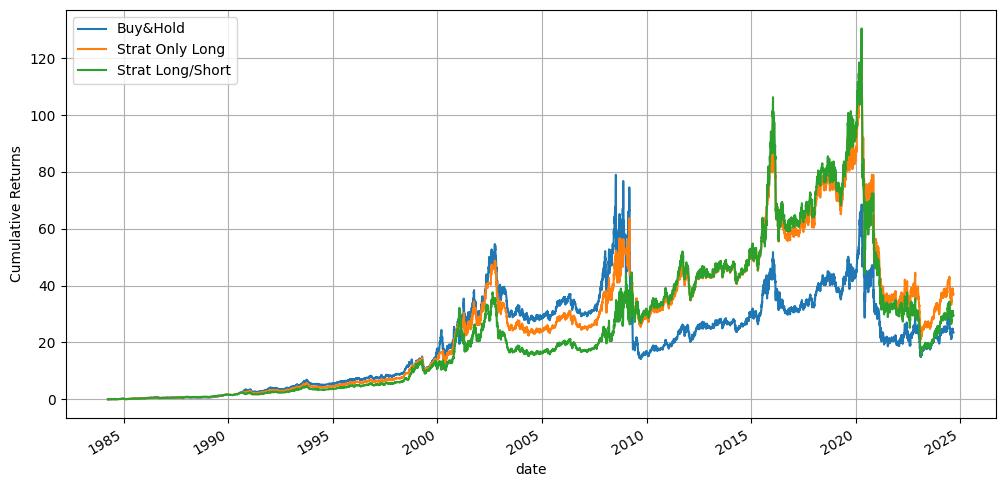

,Date,Pred,Ret,Values,Positions,Strat_ret,Positions_L,Strat_ret_L,CumRet,CumRet_L,bhRet
count,10192,10192.000000,10192.000000,10192.000000,10192.000000,10191.000000,10191.000000,10191.000000,10191.000000,10191.000000,10192.000000
mean,2004-06-08 13:50:29.199371904,0.024759,0.000460,0.028859,0.827708,0.000481,0.913846,0.000471,25.106491,27.370770,20.451675
min,1984-03-28 00:00:00,-0.081824,-0.205900,-0.742601,-1.000000,-0.205900,0.000000,-0.205900,-0.014744,-0.014744,-0.020557
25%,1994-04-25 18:00:00,0.015134,-0.005900,-0.030970,1.000000,-0.006200,1.000000,-0.004900,3.619083,4.509172,5.406691
50%,2004-06-07 12:00:00,0.025158,0.001000,0.030406,1.000000,0.000900,1.000000,0.000000,18.465783,26.108752,21.150734
75%,2014-07-22 06:00:00,0.034338,0.007400,0.094711,1.000000,0.007200,1.000000,0.006300,36.851078,42.650520,30.928740
max,2024-09-05 00:00:00,0.187662,0.143300,0.603302,1.000000,0.155900,1.000000,0.143300,130.431988,122.450730,78.932222
std,NaN,0.019473,0.017012,0.131528,0.561187,0.017013,0.280606,0.015027,24.697539,23.886451,15.311439


In [56]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()
df.plot(x="Date", y="bhRet", label="Buy&Hold", ax=ax)
df.plot(x="Date", y="CumRet_L", label="Strat Only Long", ax=ax)
df.plot(x="Date", y="CumRet", label="Strat Long/Short", ax=ax)
plt.xlabel("date")
plt.ylabel("Cumulative Returns")
plt.grid()
plt.show()

df.describe()